<a href="https://colab.research.google.com/github/sardesd/Bike-Sharing-Demand-Capstone-Project/blob/main/Bike_Sharing_Demand_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bike Sharing Demand Capstone Project**    -



##### **Project Type**    - Regression
##### **Contribution**    - Siddharth Vijay Sardesai

# **Project Summary -**

In urban environments, bike-sharing programs have emerged as a popular and sustainable mode of transportation. However, predicting the demand for bikes at different times and locations remains a challenge. To optimize the utilization of bike-sharing resources and enhance user experience, there is a need to develop a robust regression model.

Factors under consideration include various aspects like weather conditions, time of day, and even the day of the week. By applying regression analysis, a mathematical approach, we can quantify the relationships between these factors and the demand for bike-sharing services. This information becomes valuable for those managing bike-sharing programs and urban planners.


# **GitHub Link -**

https://github.com/sardesd/Bike-Sharing-Demand-Capstone-Project.git

# **Problem Statement**


The goal of this project is to create a predictive model that accurately estimates the demand for bikes based on various factors. These factors may include temporal elements such as time of day, day of the week, and seasonal variations, as well as external factors like weather conditions. By understanding the correlation between these variables and bike demand, the aim is to provide actionable insights for bike-sharing operators.

In essence, the aim is to enhance the efficiency of bike-sharing systems, ensuring they align with users' needs and contribute to sustainable urban mobility. It's a way of using data to make these systems more user-friendly, environmentally friendly, and seamlessly integrated into city life.

# ***Let's Begin !***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from sklearn.ensemble import RandomForestRegressor,StackingRegressor
from sklearn.tree import DecisionTreeRegressor
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import calendar
from scipy.stats import norm
import math
from scipy.special import fdtrc
from sklearn.feature_selection import SelectPercentile, chi2, VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import uniform

### Dataset Loading

In [ ]:
# Importing drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
path='/content/drive/MyDrive/SeoulBikeData.csv'
dataframe=pd.read_csv(path, encoding='latin1')

In [ ]:
#Create a copy
df=dataframe.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df.sample(5,random_state=0).T

,4059,6914,233,982,5967
Date,19/05/2018,15/09/2018,10/12/2017,10/01/2018,06/08/2018
Rented Bike Count,320,580,226,165,646
Hour,3,2,17,22,15
Temperature(°C),10.7,21.7,3.6,-9.7,33.6
Humidity(%),73,78,65,51,58
Wind speed (m/s),1.3,1.0,4.3,2.8,3.6
Visibility (10m),2000,2000,1061,2000,1448
Dew point temperature(°C),6.0,17.6,-2.3,-17.9,24.1
Solar Radiation (MJ/m2),0.0,0.0,0.03,0.0,1.98
Rainfall(mm),0.0,0.0,0.0,0.0,0.0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
num_rows = df.shape[0]

num_cols = df.shape[1]

print(f"The DataFrame has {num_rows} rows and {num_cols} columns.")

The DataFrame has 8760 rows and 14 columns.


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

As we can see there are no null values, so we can skip null value imputation.

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dupli= df.duplicated()


num_dupli = dupli.sum()

print(f"The DataFrame has {num_dupli} duplicated rows.")

The DataFrame has 0 duplicated rows.


There are no duplicate rows.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

1. Date: This is the specific day when the data was collected. It tells us on which date the following measurements were taken.

2. Rented Bike Count: This tells us the total number of bikes that people rented on that particular day. It’s a way to measure how popular bike renting was on that day.

3. Hour: This is the specific hour of the day when the data was recorded. It helps us understand at what time of the day the following measurements were taken.

4. Temperature(°C): This tells us how hot or cold it was outside, measured in degrees Celsius. It’s a way to understand the weather conditions on that day.

5. Humidity(%): This tells us how much water vapor was in the air, measured as a percentage. It gives us an idea about the moisture level in the air.

6. Wind speed (m/s): This tells us how fast the wind was blowing, measured in meters per second. It helps us understand the wind conditions on that day.

7. Visibility (10m): This tells us how far a person could see, measured in tens of meters. It gives us an idea about the clarity of the air.

8. Dew point temperature(°C): This is the temperature at which dew starts to form, measured in degrees Celsius. It helps us understand the atmospheric conditions.

9. Solar Radiation (MJ/m2): This tells us the amount of energy from the sun that was hitting a square meter of the ground. It’s a way to measure the intensity of sunlight.

10. Rainfall(mm): This tells us how much rain fell on that day, measured in millimeters. It helps us understand the rainfall conditions.

11. Snowfall (cm): This tells us how much snow fell on that day, measured in centimeters. It helps us understand the snowfall conditions.

12. Seasons: This tells us the time of the year when the data was recorded, like Spring, Summer, Autumn, or Winter. It helps us understand the seasonal conditions.

13. Holiday: This tells us whether or not the day was a holiday. It helps us understand if it was a regular day or a special day.

14. Functioning Day: This tells us whether or not the day was a working day. It helps us understand if it was a business day or a non-business day.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for non_numerical variable.
for i in df.select_dtypes(exclude='number').columns:
  print(i,df[i].nunique())

Date 365
Seasons 4
Holiday 2
Functioning Day 2


In [ ]:
# Check Unique Values for non_numerical variable.
for i in df.select_dtypes(include='number').columns:
  print(i,df[i].nunique())

Rented Bike Count 2166
Hour 24
Temperature(°C) 546
Humidity(%) 90
Wind speed (m/s) 65
Visibility (10m) 1789
Dew point temperature(°C) 556
Solar Radiation (MJ/m2) 345
Rainfall(mm) 61
Snowfall (cm) 51


## 3. ***Data Wrangling***

### Data Wrangling Code

Downcasting is a process where you convert the data types of DataFrame columns to more efficient types. This can be useful for optimizing memory usage, especially when dealing with large datasets.

In [ ]:
# Downcasting dtypes
def set_dtypes(df):
  df['Rented Bike Count']= df['Rented Bike Count'].astype('int16')
  df['Hour']= df['Hour'].astype('int8')
  df['Humidity(%)']= df['Humidity(%)'].astype('int8')
  df['Visibility (10m)']= df['Visibility (10m)'].astype('int8')
  df['Seasons']= df['Seasons'].astype('category')
  df['Holiday']= df['Holiday'].astype('category')
  df['Functioning Day']= df['Functioning Day'].astype('category')
  df['Month']= df['Month'].astype('category')
  df['Weekday']= df['Weekday'].astype('category')

Using Datetime operation to engineer extra features.

In [ ]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


# Concatenate 'Date' and 'Time' columns to create 'date_time'
df['date_time'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Hour'].astype(str) + ':00:00', format='%Y-%m-%d %H:%M:%S')

In [ ]:
df=df.set_index('date_time')

In [ ]:
#Datetime feature engineering
df['Month']=df.index.strftime('%B')

df['Month'] = pd.Categorical(df['Month'], categories=list(calendar.month_name)[1:], ordered=True)

df['Weekday']=df.index.strftime('%A')

df['Weekday'] = pd.Categorical(df['Weekday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

## ***Data Vizualization***

#### Univariate Analysis

We will use KDE plot to look at target distribution, and boxplots to check for outliers.

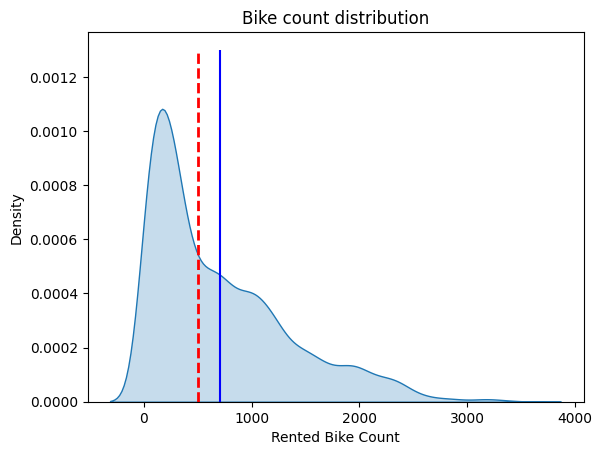

In [ ]:
#Bike count distribution
sns.kdeplot(x=df['Rented Bike Count'],fill=True)
plt.title('Bike count distribution')
plt.vlines( np.median(df['Rented Bike Count']), ymin=0, ymax=0.0013, color='red', linestyle='dashed', linewidth=2)
plt.vlines( np.mean(df['Rented Bike Count']), ymin=0, ymax=0.0013, color='blue')
plt.show()

As one might expect bike count distribution is right skewed.

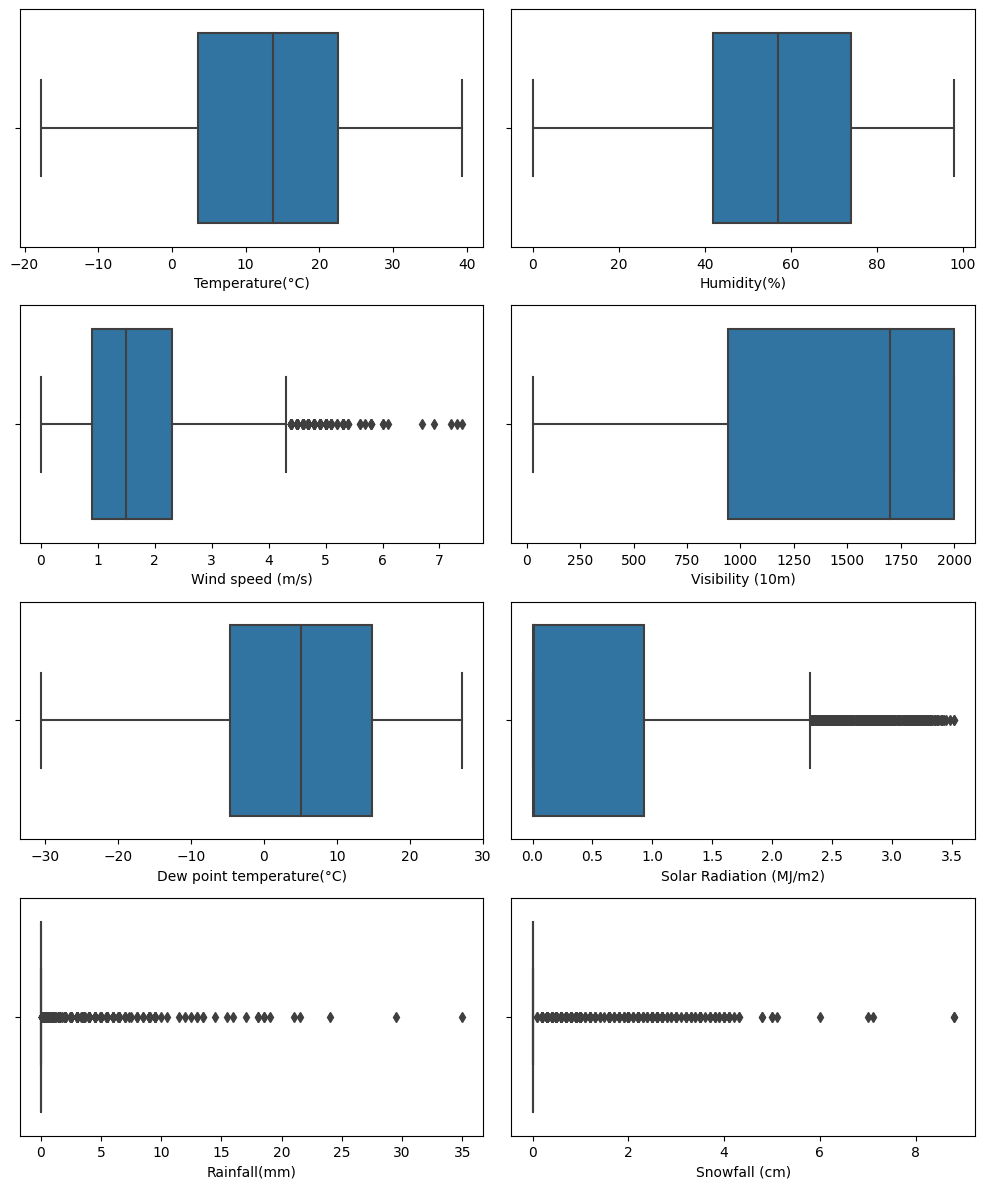

In [ ]:
# Creating subplots for other continous variables
columns = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)','Visibility (10m)',
           'Dew point temperature(°C)','Solar Radiation (MJ/m2)',
           'Rainfall(mm)', 'Snowfall (cm)']

fig, axs = plt.subplots(4, 2, figsize=(10, 12))

for i, column in enumerate(columns):
  row = i // 2
  col = i % 2
  sns.boxplot(data=df, x=column, ax=axs[row, col])

plt.tight_layout()
plt.show()

Wind speed and solar radiation is slightly right skewed whiile snowfall and rainfall is very heavily right skewed due to most values being zero.

#### Bivariate Analysis

For bivariate analysis we will primarily use lineplots to show relationship between two different variables.

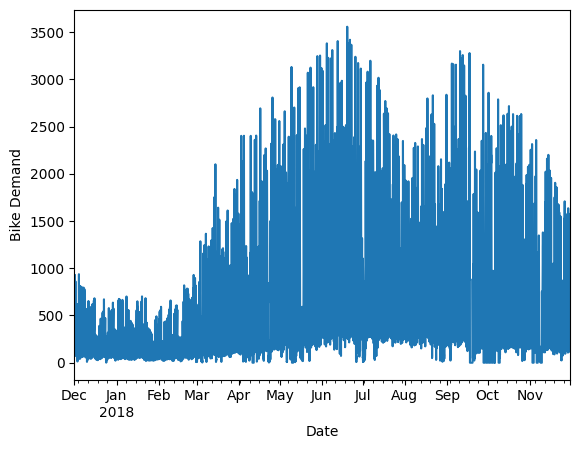

In [ ]:
# Bike demand as a function of time
df['Rented Bike Count'].plot()
plt.xlabel('Date')
plt.ylabel('Bike Demand')
plt.show()

The demand volume seems to have increased dramatically afte march 2018.

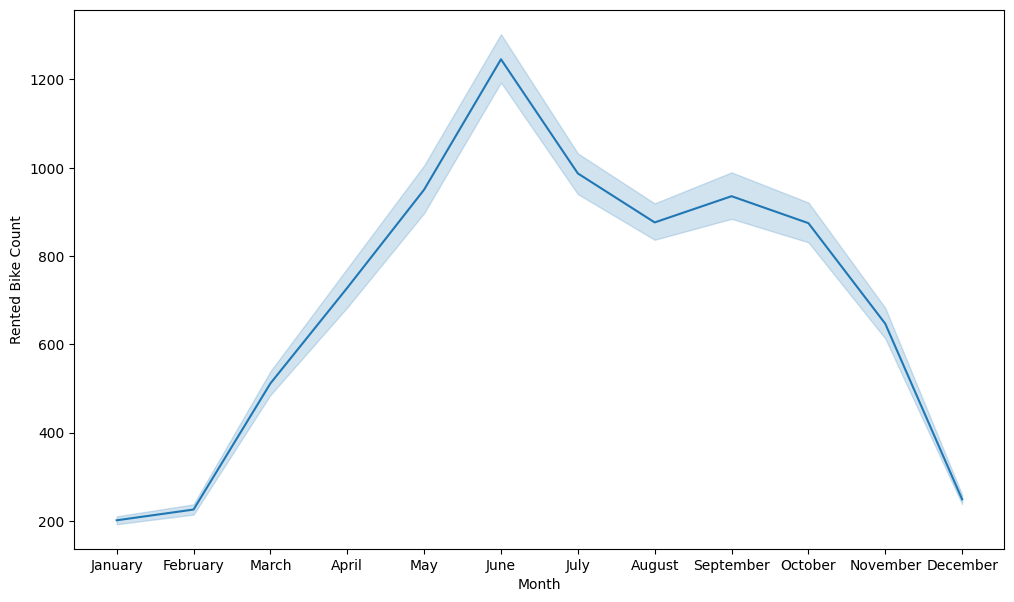

In [ ]:
#Bike demand variation in a week
plt.figure(figsize=(12, 7))
sns.lineplot(x=df['Month'],y=df['Rented Bike Count'])

plt.show()

The demand seems to peak at summertime.

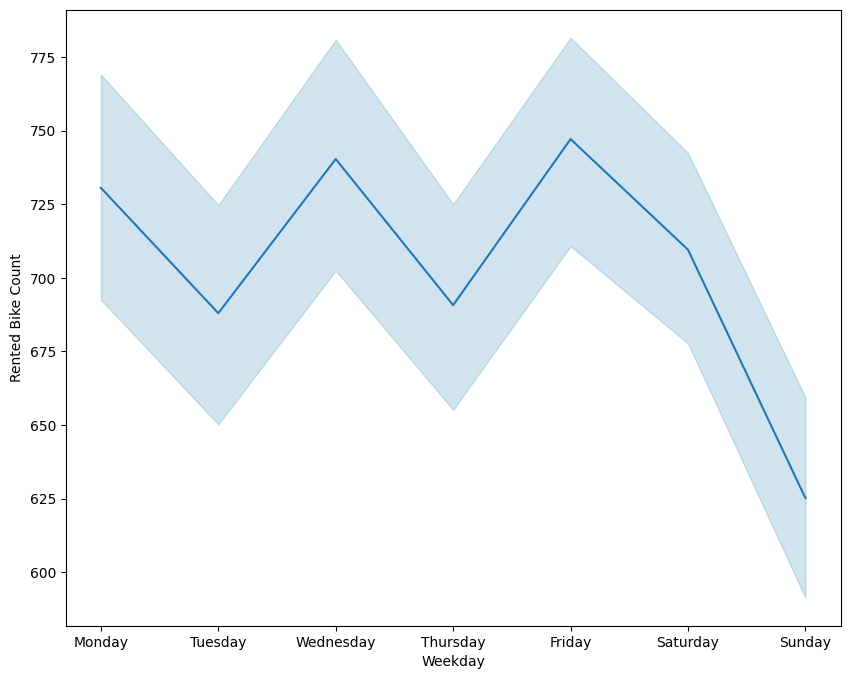

In [ ]:
#Bike demand variation in a day
plt.figure(figsize=(10, 8))
sns.lineplot(x=df['Weekday'],y=df['Rented Bike Count'])

plt.show()

We can observe low demand during weekeend.

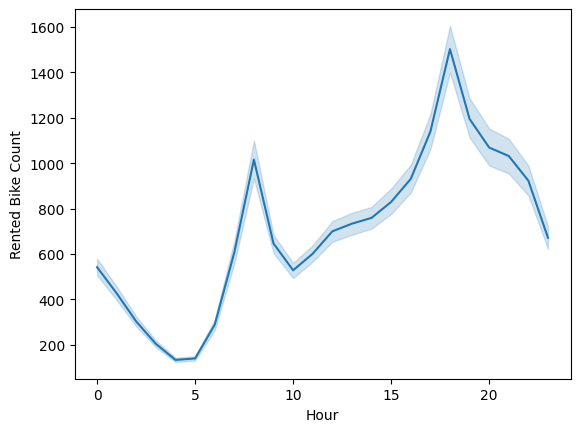

In [ ]:
#Bike demand variation in a day
sns.lineplot(x=df['Hour'],y=df['Rented Bike Count'])

plt.show()

The demand is significantly higher at night.

#### Mulrivariate Analysis

For multivariate analysis we will use, heatmap and pairplot.

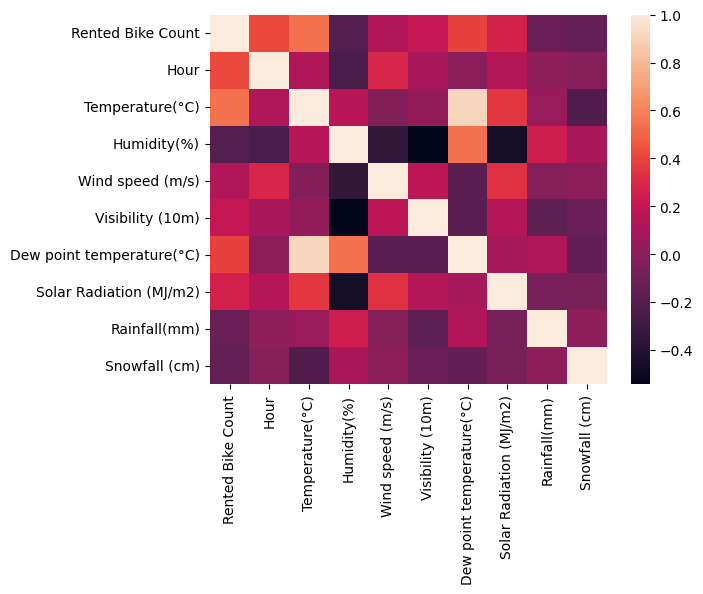

In [ ]:
# Correlational Heatmap
sns.heatmap(df.select_dtypes(include='number').corr())
plt.show()

Only strong correlation of note is Temperature and Dew  point temperature.

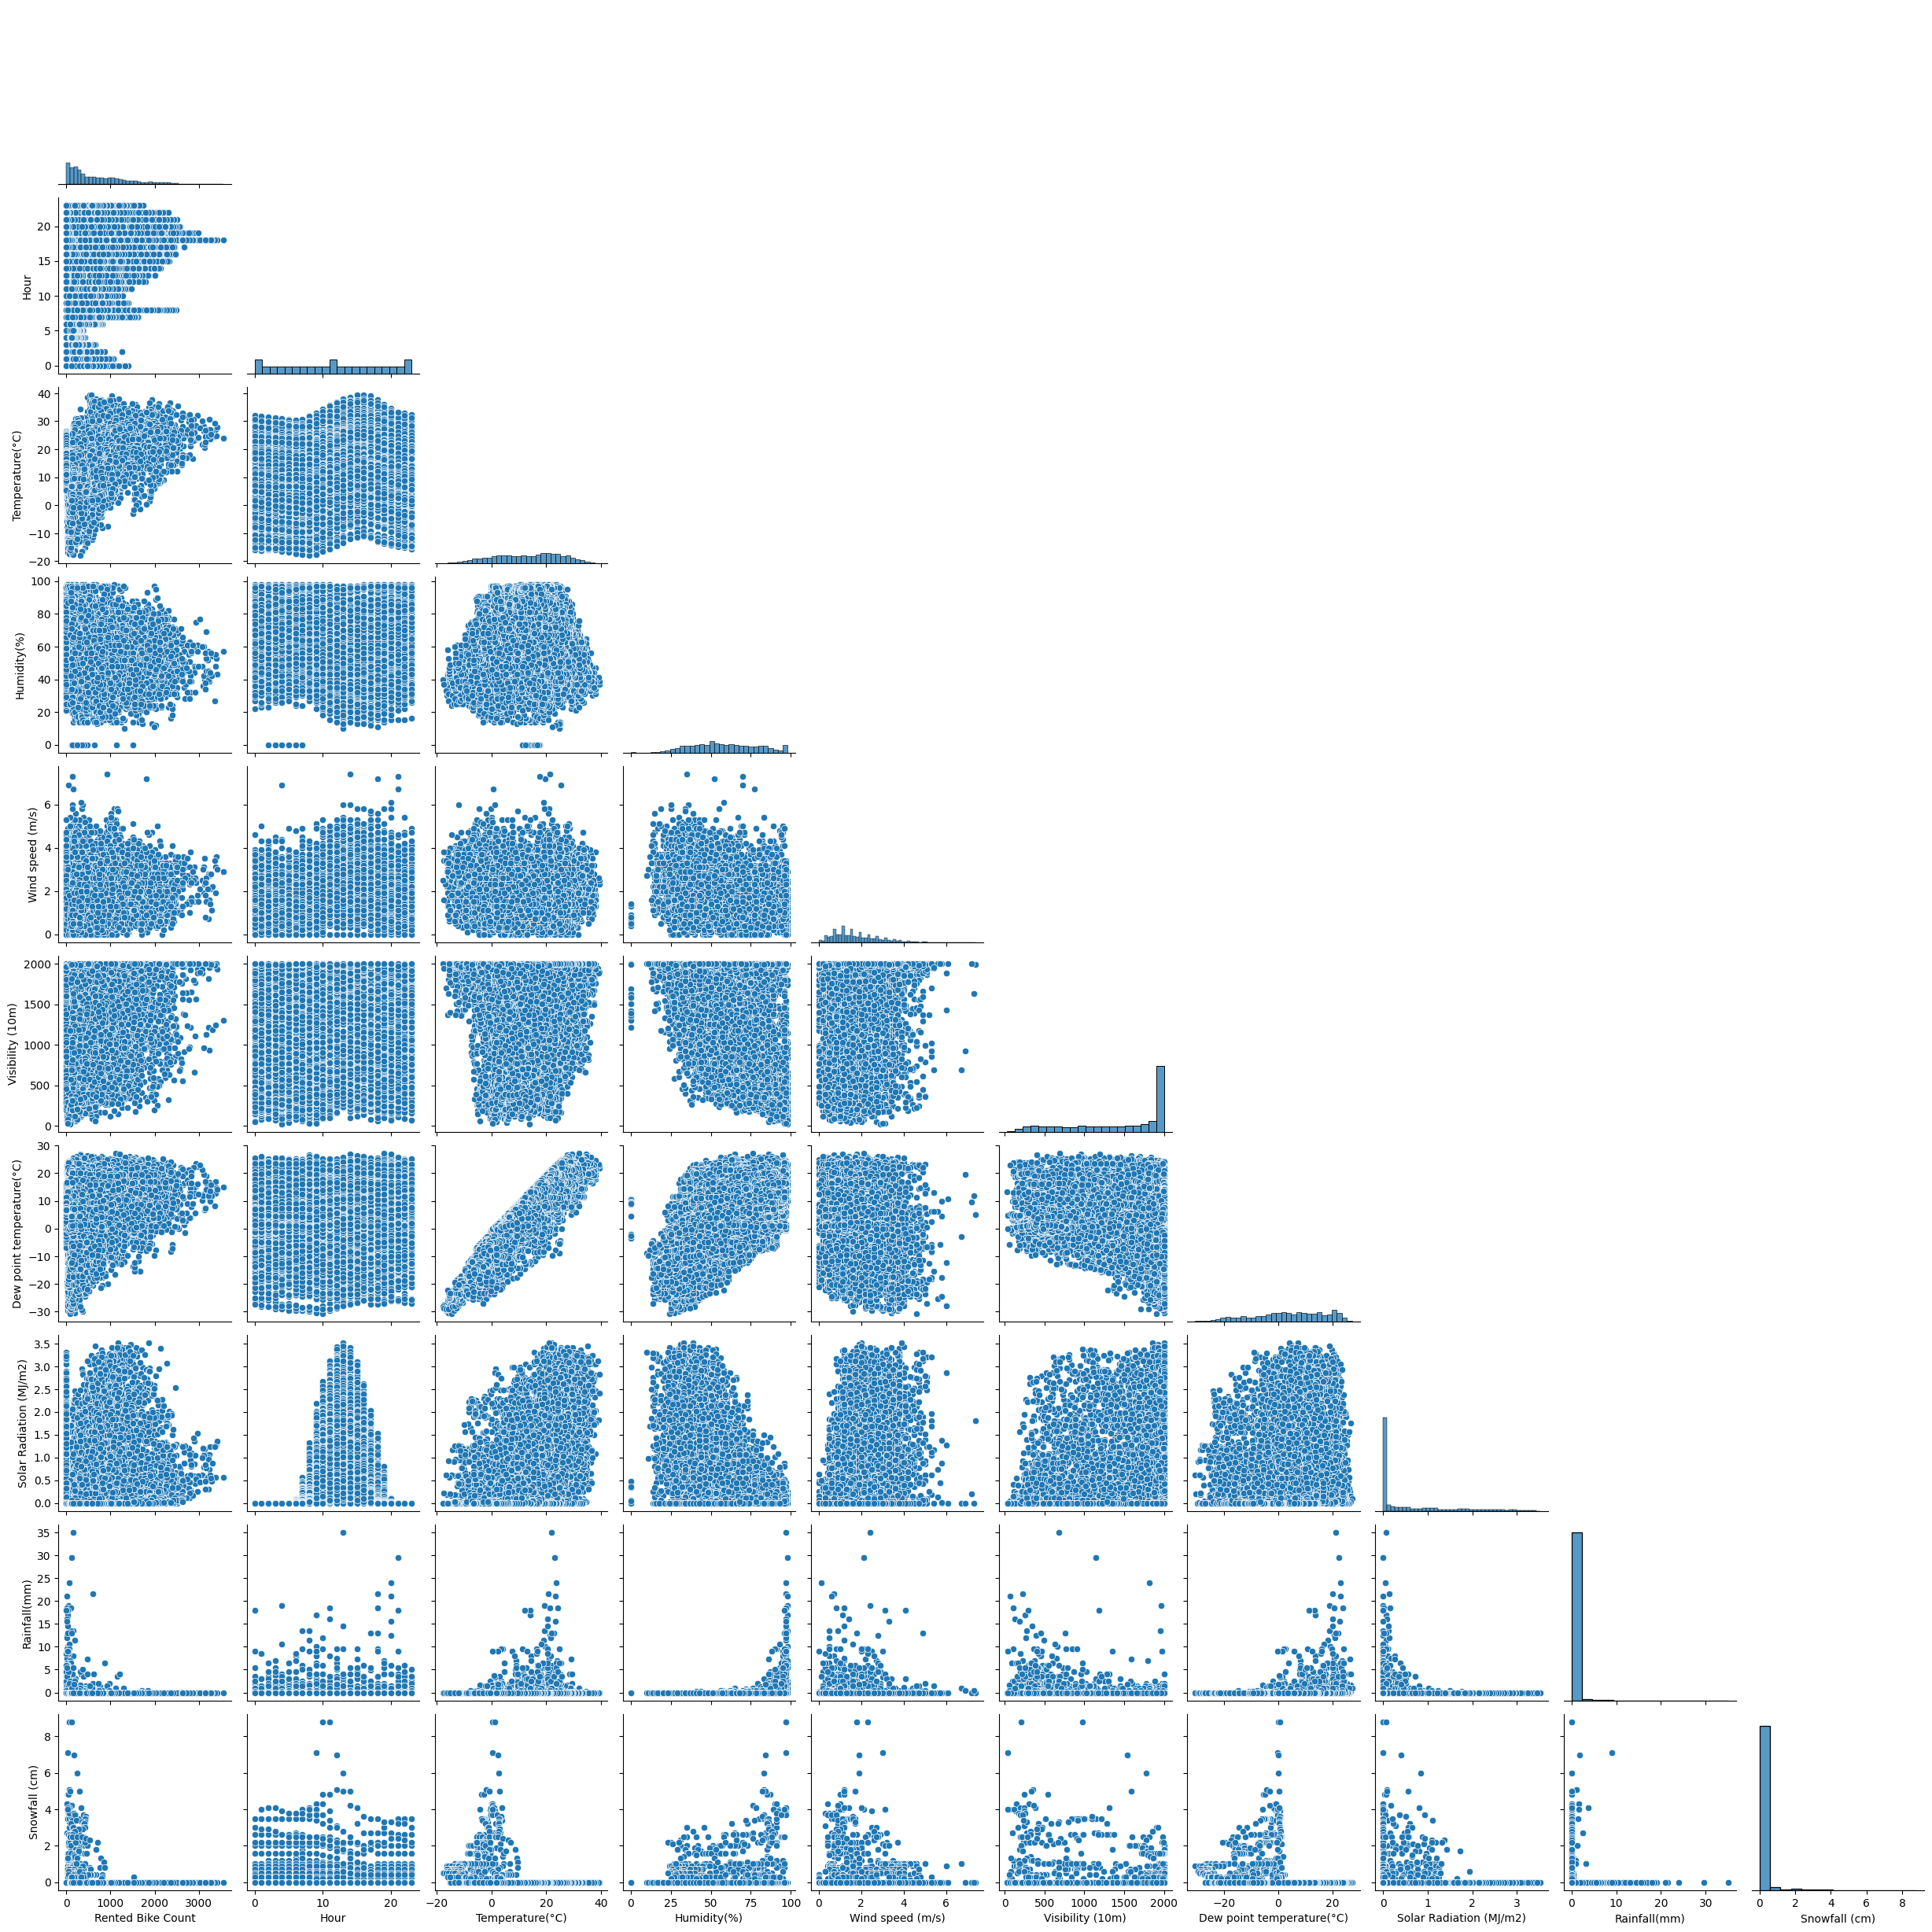

In [ ]:
sns.pairplot(df.select_dtypes(include='number'),corner=True)
plt.show()

The graph for hor and solar radiation looks almost gaussian. We can clearly see the correlation which was indicated by the heatmap. Outside of the two maps there are no discernable patterns.

## ***Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. Null hypothesis and alternate hypothesis.

1. Null hypothesis=Bike demand at 8am and 6pm are equal.
2. Alternate Hypothesis= Bike Demand is higher at 6pm as compared to 8am.

#### 2. Performing an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
demand_at_8AM = df[df['Hour'] == 8]['Rented Bike Count']
demand_at_6PM = df[df['Hour'] == 18]['Rented Bike Count']

# Calculate the sample means and variances
mean_8AM = np.mean(demand_at_8AM)
mean_6PM = np.mean(demand_at_6PM)
var_8AM = np.var(demand_at_8AM, ddof=1)
var_6PM = np.var(demand_at_6PM, ddof=1)

# Calculate the Z-statistic
z_stat = (mean_8AM - mean_6PM) / np.sqrt(var_8AM/len(demand_at_8AM) + var_6PM/len(demand_at_6PM))

# Calculate the p-value
p_value = 2 * (1 - norm.cdf(np.abs(z_stat)))

print(f"Z-statistic: {z_stat}, p-value: {p_value}")

Z-statistic: -7.2697845313023315, p-value: 3.601563491884008e-13


Since the p-value is much smaller than 0.05 we can safely reject the null hypothesis. Therefore bike demand is higher at 6 pm.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis=Bike demand is same for weekends and weekadays.
Alternate Hypothesis= Bike Demand is higher for weekday as compared to weekends.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Separate weekend and weekday data
weekday= df[df['Weekday'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])]['Rented Bike Count']
weekend = df[df['Weekday'].isin(['Saturday','Sunday'])]['Rented Bike Count']

# Calculate means
mean_weekend = np.mean(weekend)
mean_weekday = np.mean(weekday)

# Calculate standard deviations
std_weekend = np.std(weekend)
std_weekday = np.std(weekday)

# Calculate sample sizes
n_weekend = len(weekend)
n_weekday = len(weekday)

# Calculate Z statistic
z = (mean_weekend - mean_weekday) / np.sqrt((std_weekend**2/n_weekend) + (std_weekday**2/n_weekday))

# Calculate p-value
p = 2 * (1 - 0.5 * (1 + math.erf(abs(z) / math.sqrt(2))))


print(f'Z-statistic: {z}')
print(f'p-value: {p}')

Z-statistic: -3.5413751722130375
p-value: 0.0003980471534423824


Since the p-values is smaller than 0.05 we reject the null hypothesis. The demand is higher on weekdays.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis= Vacation time has no bearing on demand.

Alternative hypothesis= Demand is higher during holidays.

#### 2. Perform an appropriate statistical test.

In [ ]:
holiday = df[df['Holiday'] == 'Holiday']['Rented Bike Count']
non_holiday = df[df['Holiday'] == 'No Holiday']['Rented Bike Count']

# Calculate variances
var_holiday = holiday.var()
var_non_holiday = non_holiday.var()

# Perform F test
f = var_holiday / var_non_holiday
df1 = len(holiday) - 1
df2 = len(non_holiday) - 1

p = fdtrc(df1, df2, f)

print(f'F statistic: {f}')
print(f'p-value: {p}')


F statistic: 0.7785387215055415
p-value: 0.9996994904002036


As the p-value is greater than 0.05, we fail to reject the null hypothesis.

## ***Machine Learning Models***

For every single model we will:

1. Use the same preprocessed data.

2. Use some form of feature selection.

3. First fit the model normally, then with some hyperparameter tuning.

4. We will use multiple metrics, but ultimately rely on R-square for interpretation.

### Data Preprocessing

We will handle all of the data preprocessing in the machine learning pipeline itself. For that we will make a 'prep' column transformer.

In [ ]:
# Removing date column
df=df.drop(columns=['Date']).copy()

In [ ]:
# Defining our features and target
X=df[[i for i in df.columns if i!='Rented Bike Count']]
y=df['Rented Bike Count']

In [ ]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [ ]:
# Scaler
scaler=MinMaxScaler()

In [ ]:
# Encoding categorical variables
ohe=OneHotEncoder(handle_unknown='ignore')

In [ ]:
# Transformer
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

In [ ]:
# Lasso for regulerization and feature selection
selector = SelectFromModel(LassoCV())

In [ ]:
# objects to select numerical and non-numerical values
num_cols=make_column_selector(dtype_include='number')
cat_cols=make_column_selector(dtype_exclude='number')

In [ ]:
# Selecting columns to transform non-normally distribution
bc_cols=['Rainfall(mm)', 'Snowfall (cm)','Wind speed (m/s)','Solar Radiation (MJ/m2)']

In [ ]:
# Final 'prep' column transformer
prep=make_column_transformer((make_pipeline(ohe),cat_cols),(make_pipeline(scaler),num_cols),(make_pipeline(yeo_johnson_transformer),bc_cols))

In [ ]:
# Function to evaluate model performance

def evaluate_model_performance(reg, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    """
    Evaluate model performance on both training and test data and print out metrics.

    Parameters:
    clf (estimator): The trained model
    X_train (DataFrame): The training features
    y_train (Series): The training target
    X_test (DataFrame): The test features
    y_test (Series): The test target

    """
    # Predict the responses for train and test datasets
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)

    # Compute metrics for training data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Compute metrics for test data
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print out the metrics
    print(f"Training MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R^2: {train_r2:.2f}")
    print(f"Test MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R^2: {test_r2:.2f}")

### Polynomial Function

Polynomial regression extends simple linear regression by adding extra predictors, obtained by raising each of the original predictors to a power. This provides a better fit to the data by capturing the curvilinear relationships between the predictors and the response variable.

The polynomial function we will start with a quadratic function, and use hyperparameters to test others. We will use Lasso for feature selection.

In [ ]:
# Initial quadratic function
poly = PolynomialFeatures(degree=2)

# Regression model
lin=LinearRegression(fit_intercept=False)

# Final Pipeline
poly_pipe=pipe=Pipeline([('prep',prep),('select',selector),('reg_poly',poly),('reg_lin',lin)])

# Dictionary for hyperparameter tuning
poly_param={'reg_poly__degree':list(range(1,4)),
            'select__threshold': [0,'mean','median']}

# Gridsearch for hypreparameters
poly_grid = GridSearchCV(estimator = poly_pipe, param_grid = poly_param, cv = 3, verbose=2,scoring='r2',return_train_score=True)

# Fitting training data
poly_grid.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ............reg_poly__degree=1, select__threshold=0; total time=   0.5s
[CV] END ............reg_poly__degree=1, select__threshold=0; total time=   0.6s
[CV] END ............reg_poly__degree=1, select__threshold=0; total time=   0.5s
[CV] END .........reg_poly__degree=1, select__threshold=mean; total time=   0.4s
[CV] END .........reg_poly__degree=1, select__threshold=mean; total time=   0.5s
[CV] END .........reg_poly__degree=1, select__threshold=mean; total time=   0.6s
[CV] END .......reg_poly__degree=1, select__threshold=median; total time=   0.5s
[CV] END .......reg_poly__degree=1, select__threshold=median; total time=   0.5s
[CV] END .......reg_poly__degree=1, select__threshold=median; total time=   0.5s
[CV] END ............reg_poly__degree=2, select__threshold=0; total time=   1.1s
[CV] END ............reg_poly__degree=2, select__threshold=0; total time=   1.0s
[CV] END ............reg_poly__degree=2, select__

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7b470477d3c0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         <sklearn.compose._column_transf...
                                                                                          PowerTransformer())]),
                                                                         ['Rainfall(mm)',
                                                                          'Snowfall '
                                                                          '(cm)',
                                                                          'Wind '
                                                                          'speed '
                                                                          '(m/s)',
                                                                          'Solar '
                                                                          'Radiation '
                                                                          '(MJ/m2)'])])),
                                       ('select',
                                        SelectFromModel(estimator=LassoCV())),
                                       ('reg_poly', PolynomialFeatures()),
                                       ('reg_lin',
                                        LinearRegression(fit_intercept=False))]),
             param_grid={'reg_poly__degree': [1, 2, 3],
                         'select__threshold': [0, 'mean', 'median']},
             return_train_score=True, scoring='r2', verbose=2)

In [ ]:
# Model evaluation
evaluate_model_performance(poly_grid)

Training MAE: 212.03, MSE: 88423.87, RMSE: 297.36, R^2: 0.79
Test MAE: 224.82, MSE: 102379.30, RMSE: 319.97, R^2: 0.75


### XG-boost

XGBoost, short for eXtreme Gradient Boosting, is a powerful machine learning algorithm widely used in Kaggle competitions and other data science tasks. It’s an implementation of gradient boosting machines, which are ensemble models that work by training many weak learners and combining their predictions. For regression tasks, XGBoost can predict a continuous outcome and is capable of handling various types of feature data.

For xgboost we will use inbuilt hyperparameters for regularisation intead of lasso. We will use Randomsearch instead of Gridsearch, due to the number of hypreparameters.

In [ ]:
# Regression model
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Final Pipeline
xg_pipe=Pipeline([('prep',prep),('xg',xgb_reg)])

# Dictionary for hyperparameter tuning
xgb_param_dist = {
    'xg__learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2,0.3,0.4,0.5],
    'xg__max_depth': [3, 4, 5, 6, 7, 8],
    'xg__min_child_weight': [1, 2, 3, 4, 5],
    'xg__subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'xg__colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'xg__n_estimators' : [100, 200, 300, 400],
    'xg__gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'xg__scale_pos_weight': [1, 2, 3, 4, 5],
    'xg__reg_alpha': [0, 0.1, 0.2],
    'xg__reg_lambda': [0, 0.1, 0.2],
}

# Randomized search for hypreparameters
xg_random_search = RandomizedSearchCV(xg_pipe, param_distributions=xgb_param_dist, scoring='r2',n_iter=40, cv=3, verbose=1, random_state=42)

# Fitting training data
xg_random_search.fit(X_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7b470477d3c0>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('minmaxscaler',
                                                                                                MinMaxScaler())]),
                                                                               <sklearn.compose._column_...
                                        'xg__gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'xg__learning_rate': [0.01, 0.05, 0.1,
                                                              0.15, 0.2, 0.3,
                                                              0.4, 0.5],
                                        'xg__max_depth': [3, 4, 5, 6, 7, 8],
                                        'xg__min_child_weight': [1, 2, 3, 4, 5],
                                        'xg__n_estimators': [100, 200, 300,
                                                             400],
                                        'xg__reg_alpha': [0, 0.1, 0.2],
                                        'xg__reg_lambda': [0, 0.1, 0.2],
                                        'xg__scale_pos_weight': [1, 2, 3, 4, 5],
                                        'xg__subsample': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1.0]},
                   random_state=42, scoring='r2', verbose=1)

In [ ]:
# Model evaluation
evaluate_model_performance(xg_random_search)

Training MAE: 29.34, MSE: 1877.68, RMSE: 43.33, R^2: 1.00
Test MAE: 95.38, MSE: 26249.53, RMSE: 162.02, R^2: 0.94


### Random Forest

 Random Forest is an ensemble learning method that operates by constructing multiple decision trees at training time and outputting the mean prediction of the individual trees for regression tasks. It’s robust to overfitting, can handle a large number of features, and can implicitly handle feature interactions, making it a versatile tool for regression.

Most steps are similar for RandomForest. Similar to XG-boost we will use RandomSearch for tuning.

In [ ]:
# Regression Model
regr = RandomForestRegressor(max_depth=100, random_state=0)

# Final Pipeline
rf_pipe=Pipeline([('prep',prep),('select',selector),('rf_regr',regr)])

# Hyperparameters tuning list
rf_param= {'rf_regr__n_estimators': [10,100,1000],
        'rf_regr__max_depth': [10,100,1000],
        'rf_regr__min_samples_split': [2, 5],
        'rf_regr__min_samples_leaf': [1, 2],
        'select__threshold': [0,'mean','median'],
               }

# Fit the random search model
rf_random = RandomizedSearchCV(estimator = rf_pipe, param_distributions = rf_param, cv = 3, verbose=2, n_iter=30, random_state=42, n_jobs = -1, return_train_score=True)

# Fitting test data
rf_random.fit(X_test,y_test)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7b470477d3c0>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('minmaxscaler',
                                                                                                MinMaxScaler())]),
                                                                               <sklearn.compose._column_...
                                              SelectFromModel(estimator=LassoCV())),
                                             ('rf_regr',
                                              RandomForestRegressor(max_depth=100,
                                                                    random_state=0))]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'rf_regr__max_depth': [10, 100, 1000],
                                        'rf_regr__min_samples_leaf': [1, 2],
                                        'rf_regr__min_samples_split': [2, 5],
                                        'rf_regr__n_estimators': [10, 100,
                                                                  1000],
                                        'select__threshold': [0, 'mean',
                                                              'median']},
                   random_state=42, return_train_score=True, verbose=2)

In [ ]:
# Model evaluation
evaluate_model_performance(rf_random)

Training MAE: 127.86, MSE: 42373.54, RMSE: 205.85, R^2: 0.90
Test MAE: 46.92, MSE: 5933.00, RMSE: 77.03, R^2: 0.99


### Stacking

Stacking, also known as stacked generalization, is an ensemble learning technique that combines multiple regression models via a meta-regressor. The individual regression models are trained based on the complete training set; then, the meta-regressor is fitted based on the outputs, or the predicted values, of the individual regression models to make a final prediction. Stacking allows for the strengths of each individual model to be combined and often results in better performance.

Here we will combine xgboost and random forest to create and ensemble, ensemble model.

In [ ]:
# Define the base models
level0 = list()
level0.append(('rf', rf_random.best_estimator_))
level0.append(('xgb', xg_random_search.best_estimator_))

# Define meta learner model
level1 = LinearRegression()

# Define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=3)

# Fit the model on all available data
model.fit(X_train, y_train)

# Make a prediction
yhat = model.predict(X_test)

In [ ]:
# Model evaluation
evaluate_model_performance(model)

Training MAE: 29.34, MSE: 1837.03, RMSE: 42.86, R^2: 1.00
Test MAE: 94.76, MSE: 26065.57, RMSE: 161.45, R^2: 0.94


## ***Feature Importance***

Random Forest is a popular machine learning algorithm that offers a built-in method for feature importance calculation. This built-in method measures feature importance by looking at how much the tree nodes, which use a particular feature, reduce impurity across all trees in the forest. It computes this score automatically for each feature after training and scales the results so that the sum of all importances is equal to 1.

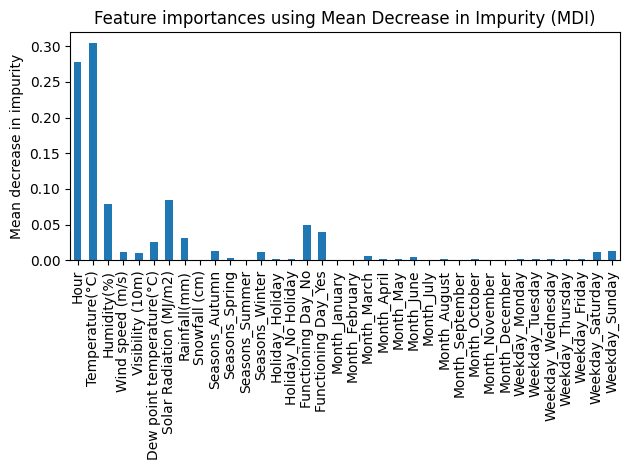

In [ ]:
X_train_dummies = pd.get_dummies(X_train, columns=['Seasons', 'Holiday', 'Functioning Day','Month','Weekday'], prefix=['Seasons', 'Holiday', 'Functioning Day','Month','Weekday'])

# Fit the model
rf_features = RandomForestRegressor()
rf_features.fit(X_train_dummies, y_train)
feature_names = X.columns
importances = rf_features.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_features.estimators_], axis=0)

ohe_feature_names = pd.get_dummies(X_train[['Seasons', 'Holiday', 'Functioning Day','Month','Weekday']], drop_first=False).columns.tolist()

# Combine with the names of the other columns
feature_names = list(X_train.drop(columns=['Seasons', 'Holiday', 'Functioning Day','Month','Weekday']).columns) + ohe_feature_names

# Plot the impurity-based importance
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=None, ax=ax)
ax.set_title("Feature importances using Mean Decrease in Impurity (MDI)")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

Looks like hour, temperature were the most important features.

# **Conclusion**

All three models - Polynomial Regression, XGBoost, and Random Forest - were able to predict the ‘Rented Bike Count’ with varying degrees of accuracy.

1. Polynomial Regression had a training R^2 of 0.79 and a test R^2 of 0.75, indicating that it was able to explain 79% of the variance in the training data and 75% of the variance in the test data. However, it had the highest Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) among the three models, suggesting that its predictions were not as close to the actual values.

2. XGBoost performed significantly better, with a perfect R^2 of 1.00 on the training data and 0.94 on the test data. Its MAE and RMSE were also much lower than those of Polynomial Regression, indicating that its predictions were closer to the actual values.

3. Random Forest also performed well, with an R^2 of 0.90 on the training data and an impressive 0.99 on the test data. Its MAE and RMSE were higher than those of XGBoost but lower than those of Polynomial Regression.

4. The Stacking model, which combined the Random Forest and XGBoost models, had performance metrics very similar to those of the XGBoost model. This suggests that the stacking model was able to effectively leverage the strengths of both base models.

In conclusion, while all three models were able to predict the ‘Rented Bike Count’ to some extent, the XGBoost and Stacking models performed the best in terms of both explaining the variance in the data (R^2) and making predictions close to the actual values (low MAE and RMSE). The Random Forest model also performed well, particularly on the test data. The Polynomial Regression model, while still able to explain a significant amount of variance, made less accurate predictions compared to the other models. These results highlight the effectiveness of ensemble methods like XGBoost, Random Forest, and Stacking in making accurate predictions.